#**Unsupervised Machine Learning with Scikit-Learn**

The following topics are covered in this tutorial:


*   Overview of unsupervised learning algorithms in Scikit-learn.
*   Clustering algorithms: K means, DBScan, Hierachical clustering etc.
*   Dimensionality reduction(PCA) and manifold learning (t-SNE)

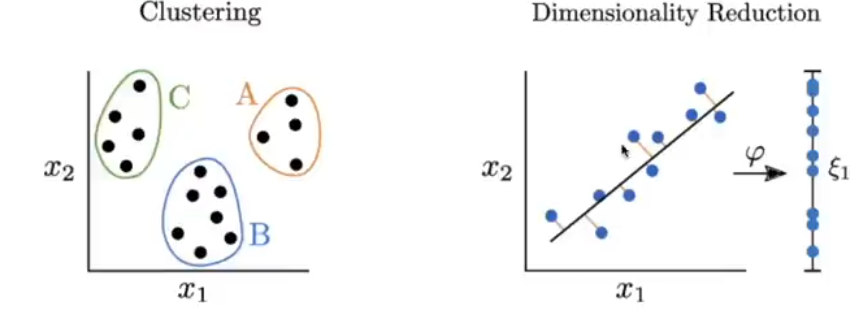

Let's install the required libraries.

**Introduction to Unsupervised Learning**

Unsupervised machine learning refers to the category of machine learning techniques where mmodels are trained on a dataset without labels. Unsupervised learning is used to discover patterns in data and reduce high-dimensional data to fewer dimensions.
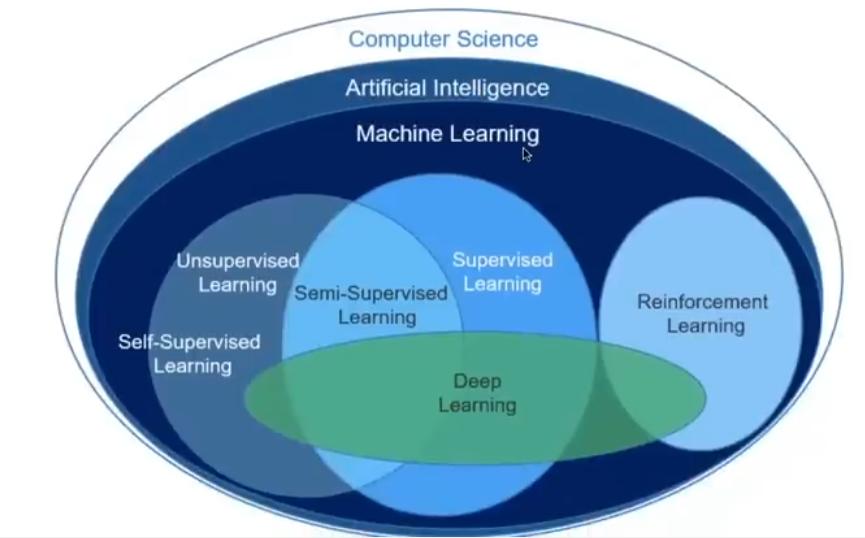

Classical ML.png

We use classical machine learning because alot of data we work with is tabular data.

When data has no labels, we use unsuperevised learning.
*  Clustering is where we create similar stacks of data.
*  Dimension reduction to reduce the dimension of data.
* Association between diffrent data points and use it for doing recommendation.
  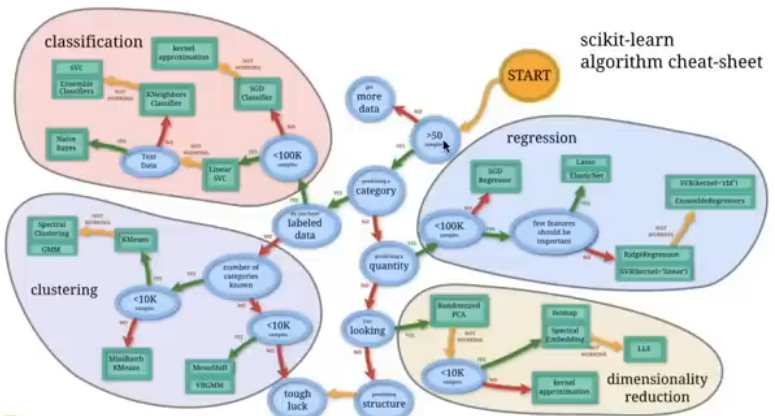




If you are predicting a category and you have some labeled data, use **classification**, on the other hand if you are trying to predict a category and you don't have labeled data, then use **clustering**.
If you are predicting a quantity use **regression**, while if you want to to visualize data/reduce its size then use **dimensionality reduction techniques**.

##**Clustering**

Clustering is the process of grouping objects froma dataset such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups.

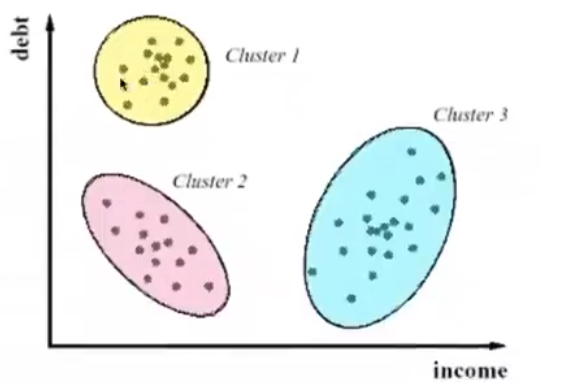

The plot above is an example of incomes of various people and the amount of debt they have at the moment.



1.   Cluster 1 - Low income high debt
1.   Cluster 2 - Low income and low debt
2.   Cluster 3 - High income and low debt

The goal is to identify the cluster a particular person belongs to or figure out what the clusters should look like.

Given all the points, figure out how many clusters ther are in the data, which clusters do each of the points belong to, and potentially if there is a new data point that comes in, which cluster does it belong to.





Here are some real-world applications of clustering:
*   Customer segmentation
*   Product recommendation
*   Feature Engineering
*   Anomaly/fraud detection
*   Taxonomy creation





**Customer Segmentation** : Suppose you are a bank and your are looking at loan applications, you might want plot incomes and debts and see where the person lies. You may have different set of operating rules for low income high debt people, low income low debt and high income low debt people. To simply the decision making process, feed the variable in to a computer algorithm, get back a category for them and use that category to make decisions for them.

**Feature Egineering:** Perform some clustering on the data and then take the cluster numbering andd it on the training data as a categorical column.This might improve the training of Decision Tree/GBMs.

**Product Recommendation**: If you can identify clusters of people who likes a particular product, then you recommend the same product to people who have similar behaviour.

**Anomaly/Fraud Detection**: This can be applicable in credit card anomaly detection, if you cluster the credit card transaction, fradulent transactions stand out i.e. some credits cards make many transactions hence they dont fall in regular clusters but fall within the anomolous cluster.

**Taxonomy creation:**This applies hierachical clustering. Take a bunch of different attributes about animals and use that to create clusters of related fanilies/kingdom of animals.

We'll us the iris flower dataset to study some of the clustering algorithms in `scikit-learn`. It contains value measurements for 150 flowers belonging to 3 diffrent species.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
iris_df  = sns.load_dataset('iris')

In [3]:
iris_df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

Lets assume we don't know which species the flowers belong to. We will  apply clistering techniques to  group all the flowers in to diffrent clusters and see if the clusters that the algorithm have picked out based on the 4 observations match the species or not.

In [4]:
sns.scatterplot(data = iris_df, x = 'sepal_length', y = 'petal_length', hue = 'species')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

The points would look like this, if I didn't have any information about the species.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

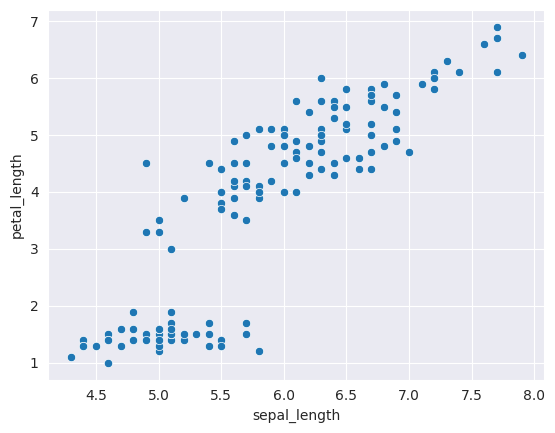

In [5]:
sns.scatterplot(data = iris_df, x = 'sepal_length', y = 'petal_length')

Loooking at the points you might conclude that there are two clusters, maybe the clusters are three.

This is based on 2 dimensions i.e. `Sepal_Length` and `Petal_Length`. We ca't visualize all the 4 dimensions. So we try different combinations of 2 dimensions and 3 dimensions.


<Axes: xlabel='sepal_width', ylabel='petal_width'>

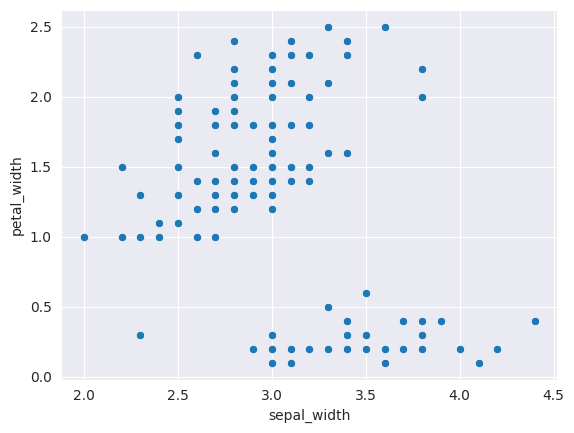

In [6]:
sns.scatterplot(data = iris_df, x = 'sepal_width', y = 'petal_width')

Looking at the combination of sepal width and petal width, you can see clusters begin to form.

We can't visulaize 4D. We train a model to figure out the clusters given the 4 measurements: `sepal_length`, `sepal_width`, `petal_length`, `petal_width`.

We'll attempt to cluster observations using numeric columns in the data.

In [7]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [8]:
X = iris_df[numeric_cols]

### **K Means Clustering**

The K-means algorithm classify objects in a pre-determined numeber of clusters by finding optimal central points(centroids) for each cluster. Each object is classified as belonging to the cluster represented by the closest centroid.

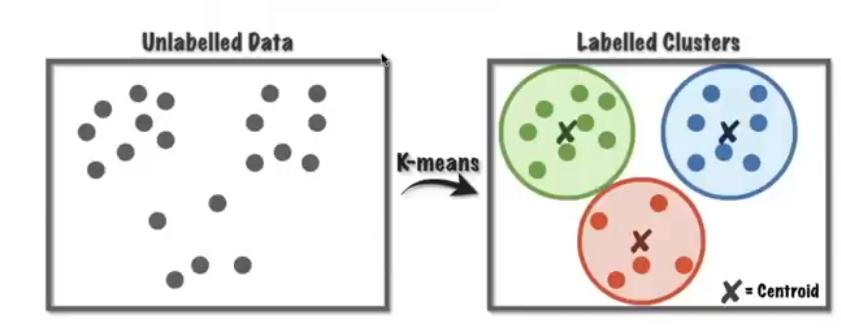

Here's how the K-means algorithm works:
1.   Pick K random objects as the initial cluster centers.
2.   Classify each object into the cluster whose center is closest to the point.
1.   For each cluster of classified objects, compute the centroid(mean).
2.   Now reclassify each object using the centroids as cluster centers.
1.   Calculate the total variance of the clusters(this is the measure of goodness).
2.   Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.

**After iterating multiple times, choose the cluster with the lowest variance. The variance is calculated within a cluster. All the variances from all the clusters are summed. The variances are then compared across the many iterations and the lowest one chosen**

A low total variance implies all the points within each cluster are close together.
A high total total variance implies all the points in a certain clusters that are very far a way from each other.

In K-means we pick the cluster centers which minimise the total variance.

Let'apply K-means clustering to the iris dataset to cluster on 4 dimensions.







In [9]:
from sklearn.cluster import KMeans

In [10]:
model = KMeans(n_clusters=3, random_state=42)

In [11]:
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

We can check the cluster centers for each cluster

In [12]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

For cluster 1, the center is at a sepal length of 5.9, the sepal width of 2.74, petal length of 4.3 and petal with of 1.43. The 2nd and the 3rd cluster.

When we want to classify points using the model, we check the difference between the points and the centers.

We substract the cluster center from the actual values and then we add the squares of those distances.

Each point is assigned to the cluster center that it is closest to. Closesness is assigned using the Euclidean Distance/L2 norm.

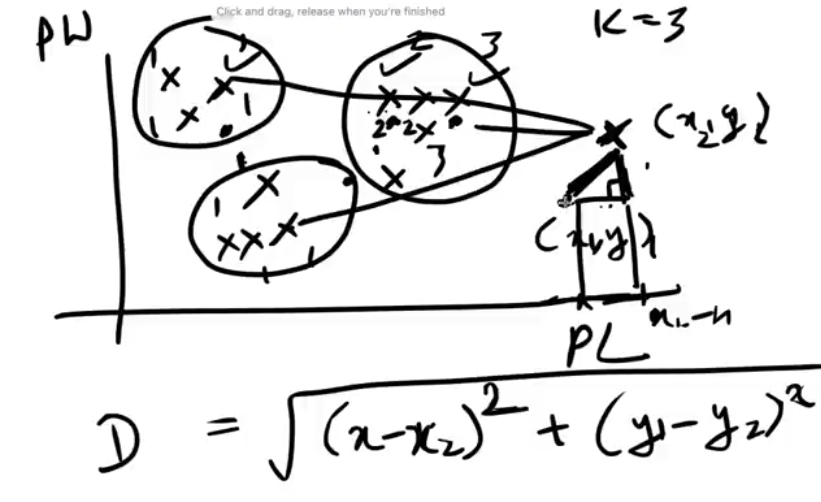

We can now classify points using the model.

In [13]:
X

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [14]:
preds = model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

The points belong to cluster 0,1 & 2. The model figure out that calculating the distance of the flower to cluster center 1 2 & 3 (for the first observation) turns out to be closer to cluster center 1




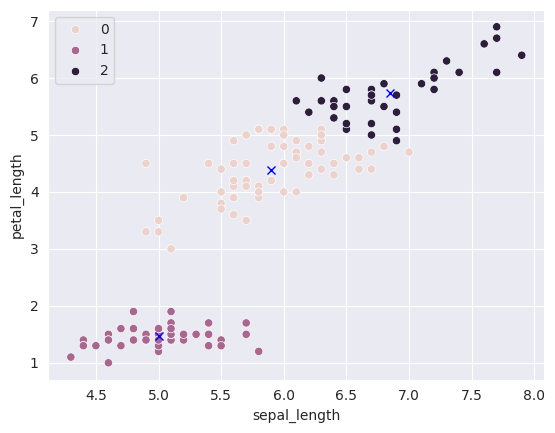

In [15]:
sns.scatterplot(data = X, x = 'sepal_length', y='petal_length', hue=preds);
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

As you can see, K-means algorithm was able to classify (for the most part) different species of flowers in to separate clusters. Note that we did not provide the `species` column as an input to `KMeans`.

We can check the `goodness` of the fit by looking at `model.inertia_` which contains the sum of squared distances of samples to their closest cluster center. The lower the inertia, better the fit.

In [16]:
model.inertia_

78.851441426146

The total variances of all the individual clusters is called the `inertia`. The variance tells you the spread of the data, the less the spread within the cluster the better the goodness of fit.

Let's try creating 6 clusters.

In [17]:
model = KMeans(n_clusters = 6, random_state = 42).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
preds = model.predict(X)
preds

array([3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3,
       3, 0, 3, 0, 3, 0, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 4, 5, 4, 5, 4, 5,
       5, 4, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 4, 5, 5, 5,
       4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 1, 5, 2, 1, 1, 2, 4, 2, 1, 2,
       1, 1, 1, 5, 1, 1, 1, 2, 2, 5, 1, 5, 2, 5, 1, 2, 5, 5, 1, 2, 2, 2,
       1, 5, 5, 2, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 5], dtype=int32)

In [19]:
sns.scatterplot(data = X, x = 'sepal_length', y = 'petal_length', hue = preds);

In [20]:
model.inertia_

39.03998724608725

This is a better classification. The inertia in this case is much lower because the total variance across all clusters is very low as compared to the previous one of 78.

In most real-world scenarios, there's n predetermined number of clusters. In such a case, you can create a plot of `No. of clusters` vs `inertia` to pick the right number of clusters.

Just take a small sample of data i.e. 100/1000 from the million or so datapoints and then try different number of clusters and for each value of `K`, train the model and compute the `inertia` of the model and then plot the `inertia` against `K`.

Text(0, 0.5, 'Inertia')

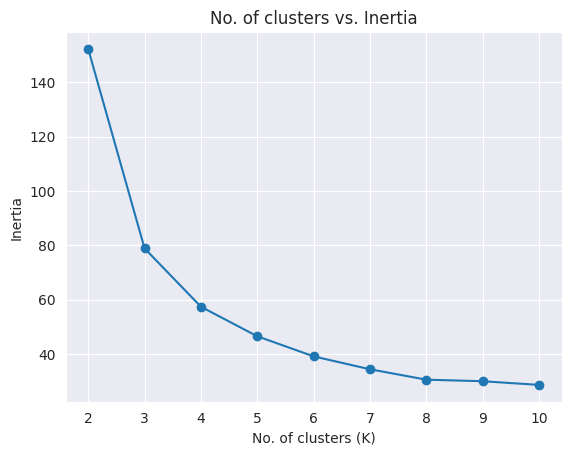

In [21]:
options  = range(2,11)
inertias = []

for n_clusters in options:
  model  = KMeans(n_clusters, n_init='auto', random_state=42).fit(X)
  inertias.append(model.inertia_)

plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia')

The chart creates an `elbow` plot, and you can pick the number of clusters beyond which the reduction in inertia decreases sharply.

Thereis a huge decrease when we go from 2 clusters to 3 clusters and around 6 things start to flatten out.

**Mini Batch K Means:** The K-means algorithm can be quite slow for really large dataset. Mini-batch K-means is an iterative alternative to K-means that works well for large datasets.

In the Mini Batch K Means  algorithm, instead of classifying all the points, pick a fixed number of points called the **Mini Batch size**, compute their `centroids/cluster centers` for those i.e. 100 points. Then pick the next 100 points and for those next 100 points, start by using the previous centroids rather than the random K points. Each time you pick a batch size of 100/300... and use that to update the centroids/cluster centers from the previous batch.




>**EXERCISE:** Perform clustering on the `Mall customers dataset` on Kaggle. Study the segments carefully and report your observations.

By default the number the whole experiment should be repeated so as to find a good cluster center can go up to 300. `max_iter = 300`

### **DBSCAN**

Density-based spatial clustering of applications with noise (DBSCAN) uses the density of points in aregion to form clusters. It has two main parameters: `epsilon` and `min samples` using which it classifies each point as a core point, reachable point or noise point(outlier)


DBSCAN.png

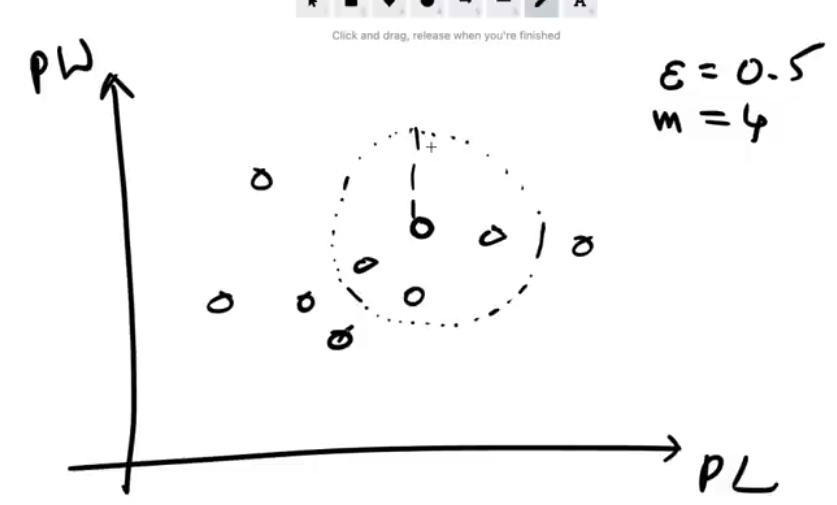

This is how **DBSCAN** works:
 *  Set `epsilon` to 0.5 and `min_samples` to 4.
 *  Starting at any point, draw a circle with the radius `epsilon` around the point.
 * Then we check if in the circle we have 4 points including the point itself. If we have at least 4 points, then we say that this is a **core point**. Color the core point dark and then everything else connected to the `corepoint` is part of the same cluster.
 * Then we move to the next point and draw a circle of radius `epsilon` around it. If it has atleast 4 points, it is also a `core point`.
 * Some points which are parts of existing corepoints might not be `corepoints` in themselves because they lack athe `min sample values`. This is called a **Reachable Point** or **H point** and is like the edge of the cluster.
 * This way we have now identified one cluster of points where we have 4 corepoints each connected to each other.
 *  The point that is neither a core point nor a `H point` because it doesn't have 3 around it and it is not connected to a `core point ` is called an **outlier** or a **noise point**.

Corepoint1.png

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [23]:
?DBSCAN

Configure eps = `0.5`, min_samples = `5`, metric = `euclidean`, leaf_size =`30`.
`euclidean` is the default and in 4 dim it takes the square root of 1st dim difference squared + 2nd dim difference squared + 3rd dim difference squared . . . using `Pythagoras Theorem`.


In [24]:
model = DBSCAN(eps = 1.1, min_samples = 4)

In [25]:
model.fit(X)

DBSCAN(eps=1.1, min_samples=4)

**Silhouette Score:** Measures how similar each point is to its own cluster compared to other clusters. The score ranges from **-1 (bad) to 1 (good)**.

In [26]:
labels = model.fit_predict(X)
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.6867350732769781

In `DBSCAN`, there's no prediction step. It directly assigns labels to all inputs. This is because the definition of a core point depends on certain points being there in the dataset unlike in K Means where we figure out the center of a cluster but in **DBSCAN** there is no center of a cluster. So you cannot use DBSCAN to classify new observations.

**DBSCAN assigns labels to all the existing observations.**

Check `model.labels_` and it automatically tells you that for the inputs given, all of them need to be considered to perform the DBSCAN algorithm., these are the labels that got assigned i.e. `0` and `1`.

Check which ones are `corepoints`, `reachable points` and `noise points`

In [27]:
#dir(model)##check the attributes/properties/methods of the model

In [28]:
model.core_sample_indices_##corepoints

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [29]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
sns.scatterplot(data = X, x='sepal_length', y='petal_length', hue = model.labels_)

<Axes: xlabel='sepal_length', ylabel='petal_length'>

>**EXERCISE:** Try changing the values of `eps` and `min_samples` and observe how the number of clusters the classification changes.

`eps` can be any value i.e. `0 - 100`, similarly `min_samples` can be `1 - 100`.

Here's how the results of `DBSCAN` and K Means differ:
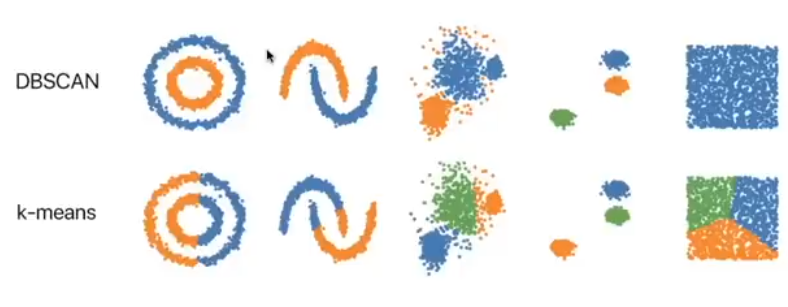

1. K-means uses the concept of a cluster center and it uses the distance from a cluster center to define the cluster. DBSCAN uses a nearness from the points themselves to create a cluster.
2. In K-means you can specify how many clusters you want, but in DBSCAN it figure out on on its own and you can only change the the epsilon and min_sample to indirectly affect the number of clusters that gets created.
3. You can classify new points in a cluster using K-Means, but you can't use DBSCAN to classify new points because it is possible that by the introduction of a new cluster, 2 clusters may join together.

###**Hierachical Clustering**
Hierachical clustering, as the name suggests, creates a hierachy or a tree of clusters.
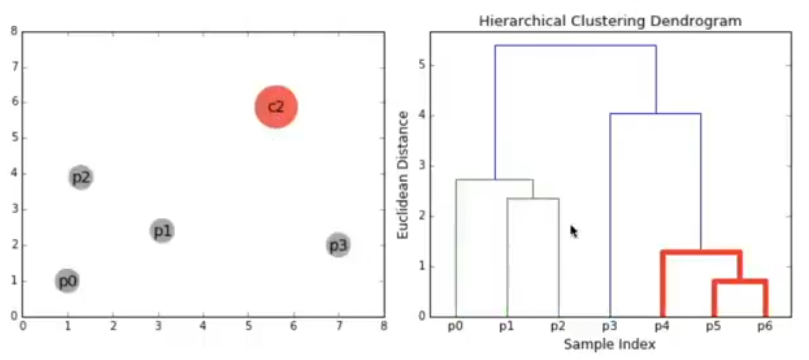

*  We have a bunch of points and first we take the 2 closest points and i.e. `p5`and `p6` and we combine those two closest points in to a cluster `c1`.
*  We find the next 2 closest points which turns out to be the cluster point `c1` and another point `p4` to form `c2`.
* In this way we create a tree of clusters. This clustering can be used to generate a taxonomy i.e. a bunch of observations about very different animals.

While there are several approaches to hierachical clustering, the most common aaproach works as follows:


1.   Mark each point in the dataset as a cluster.
2.   Pick the two closest cluster centers without a aparent and combine them into anew cluster.
3.  The new cluster is the parent cluster of the two clusters, and its center is the mean of all the points in the cluster.
4.  Repeat steps 2 and 3 till there's just one cluster left.

*This time you could be combining a cluster center from a cluster and a leaf and that could then become their parent cluster and then you pick the 2 closest and you keep picking the closest cluster centers eachtime that do not already have a parent and that is how you get to the top level.*

The resultant structure is called a **dendogram**

>**EXERCISE:** Implement hierachical clustering for the iris dataset using `scikit-learn`.



## **Dimensionality Reduction and Manifold Learning**

We often encounter datasets with a very large number of dimensions (features or columns). Dimensionality reduction techniques are use to reduce the number of dimensions or features within the data to a manageable or convenient number.

Applications of dimensionality reduction:
*   Reducing the size of data without loss of information
*   Training machine learning models efficiently
*   Visualizing high-dimensional data in 2/3 dimensions






### **Principal Component Analysis(PCA)**

PCA is a dimensionality reduction technique that uses linear projections of data to reduce their dimensions, while attempting to maximize the variance of data in the projection.

Here's an example of PCA to reduce 2D data to 1D: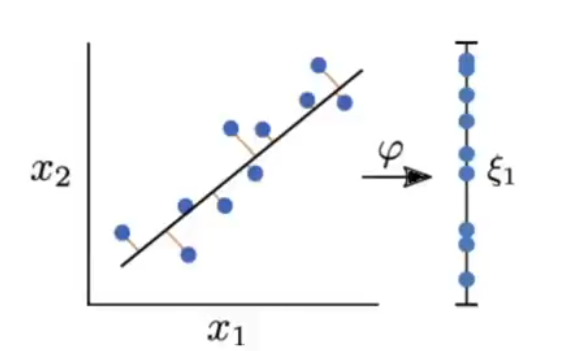

Let's say we have some data i.e. `Petal_Length` and `Petal_Width`. Then we plot it. For PCA, we just want to see 1 value i.e. `PCA1` instead of the 2 columns of data.
PC1.png

* Center the points, calculate the mean
`X` of the coordinates and substracting the mean from all these points and similarly substracting the mean of the `Y` coordinate. Some of the points will have a -ve value and some of the points a +ve value.
* Then we try a acndiadate line on which to project the points.
PC2.png


*  The points can now be represented by the
perpendicular distance of its **projection** from the zero point
* We can now fill the values of PC1 which is the distance of its projection from the zero point on the projected line.
* We can now fill in the values of `PC1` i.e. `d1`, `d2`, `d3`, `d4`.

PC3.png

We rotate the line and pick the line
that maximize sum of squares of `d1^2`+ `d2^2`+ `d3^2`+ `d4^2` is the highest.

Once we have the centered points , we pick the line where the projections are very far away so to capture the spread of the data easily and not capturing the spread of the data for an ill fitting line.
PC4.png


Here's is an example of PCA to reduce 3D data to 2D:
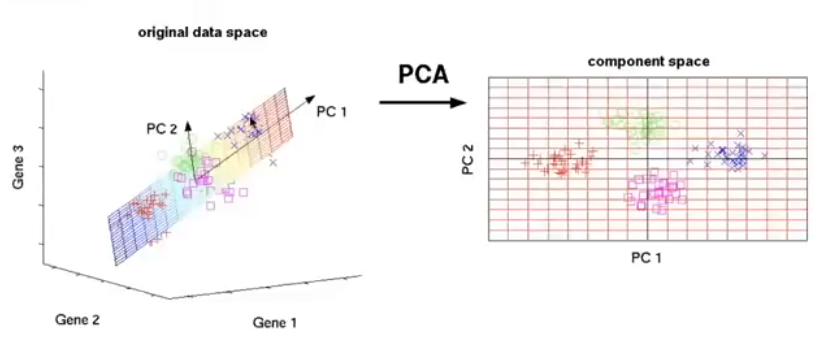

* In the above example we have 3 features, we first find the best possible line along we can project all the points which maintains the highest variance.
* `PC2` is a line which is perpendicular to first line `PC1`. We pick the line which maximises the variance of the points when they are projected on `PC2`.
* For 3 dim. we have `PC1`, `PC2`, 4 dim. we have `PC1`, `PC2`, `PC3` and so on .... 200 dim, pick the 5 highest variance preserving lines.

Let's apply PCA to the iris dataset

In [34]:
iris_df = sns.load_dataset('iris')
iris_df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [36]:
numeric_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [38]:
from sklearn.decomposition import PCA

In [40]:
?PCA

In [41]:
pca = PCA(n_components=2) #provide the number of target dimensions as 2

In [44]:
pca.fit(iris_df[numeric_cols])

PCA(n_components=2)

We are moving from 4 dim. to 2 dim. We pick 2 possible linear combinations of the 4 independent features. It is a projections on the lines that we are left with.

In [45]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

These are the components. The first 4 numbers, convey the direction of the first line and the next 4 numbers convey the direction of the 2nd line in 4 dim. space. The 2 lines are perpendicular. i.e. dot product  = 0

Using the components, we project the points on the line.

In [53]:
pca

PCA(n_components=2)

In [54]:
iris_df[numeric_cols]

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [55]:
transformed = pca.transform(iris_df[numeric_cols])

In [56]:
transformed

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

<Axes: >

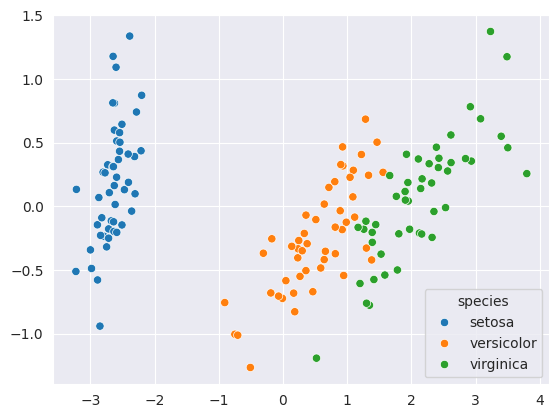

In [52]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1],hue = iris_df['species'])

You can as well plot the clusters detected earlier in DBSCAN

In [57]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1],hue=model.labels_)

<Axes: >

Dimensionality reduction let you visualize the clusters that we generate from clustering and evaluate them better.

*If could trade 200 columns for 5 columns for a 5% loss in variance, that could give you 40 times speed up which might be crucial as you can analyse 40 times more data in the same time making them very good for large datasets.*


The limitations:
* It uses linear projections which may not always achieve good separation of the data. The best line might loose data because most of the projections fall in the same place. i.e. points parallel to each other are all projected on the same points hence some are lost.


>**EXERCISE**: Apply PCA to al rge high-dimensional dataset and train a machine learning model using the low-dimesional results. Observe the changes in the loss and training time for differnt numbers of target dimensions.

## **t-Distributed Stochastic Neighburhood Embedding (t-SNE)**
Manifold learning is an approach to non-linear dimensioanility reduction. Algorithms for this task are based on the idea that the dimesionality of many data sets is only artificially high. A commonly-used manifold learning technique is t-Distributed Stochastic Neighbor Embedding or `t-SNE`, used to visualize high dimensional data in one, two or three dimensions.

Here's is a visual representation of `t-SNE`  applied to visualize 2 dmensional data in 1 dimension:

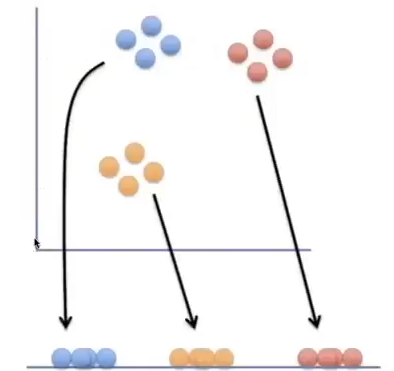

`t-SNE` first projects the points on a line and uses `a nearness rule`. Every point that is projected on the line is moved closer to the point that is closer to it in the real dataset. When you need to maintain the closeness no matter how much you reduce the dimensions.

Here's a visual representation of t-SNE applied to the `MINST` dataset, which contains `28px x 28pc images of handwritten digits 0 to 9, a reduction from 784 dimensions to 2 dimensions.
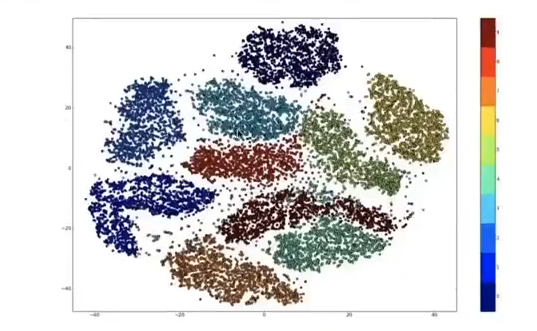

Whenever you have high dimensional data, use `t-SNE` to visualize data. `t-SNE` does not work very well if youhave many dimensions.

**In normal practice, you take 784 dimensions and perform PCA to reduce it to 50 dimensions and then take 50 dimensions and reduce it to 2 dimensions using t-SNE.**

The data from `t-SNE` is not useful for data analysis/ML rather it is used for visualization because you can see which points are closer together in the original data.







In [59]:
from sklearn.manifold import TSNE

In [60]:
?TSNE

In [61]:
tsne  = TSNE(n_components =2)##Set the number of components/dimensions

In [62]:
iris_df[numeric_cols]

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [63]:
transformed = tsne = tsne.fit_transform(iris_df[numeric_cols])

In `t-SNE`, there is no `fit` and `transform` step, both of them are combined in to a `fit-transform` step because closeness of the points is very important.

You don't use `t-SNE` on new data but on the data that you already have.


<Axes: >

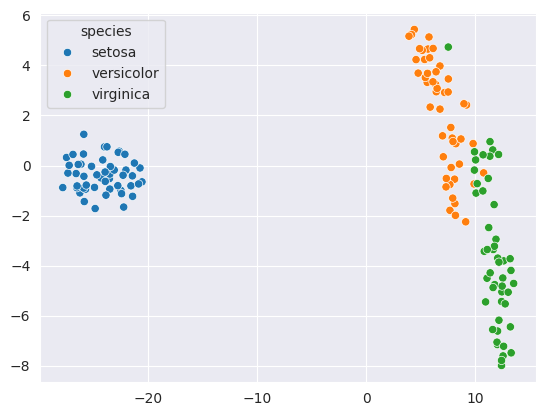

In [65]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species'])

The flowers from the same species are clustered very closely together.The relative distance between the species is also conveyed by the gaps between the clusters.

`PCA` is good when doing Machine Learning and `t-SNE` is good when visualizing the results.

>**EXERCISE**: `Use t-SNE` to visualize the MNIST handwritten digits dataset.